AxesSubplot(0.125,0.125;0.775x0.755)


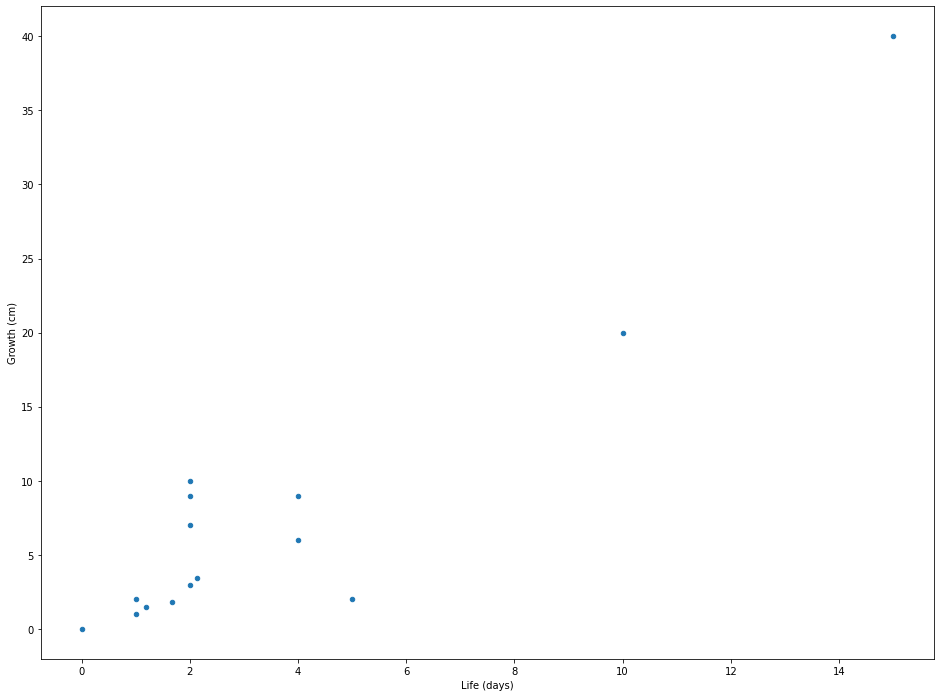

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'exec(%matplotlib inline)'

path = 'resources/cactus_sizes.txt'
data = pd.read_csv(path, header=None, names=['Life (days)', 'Growth (cm)'])

# print(data.head())

# print(data.describe())

print(data.plot(kind='scatter', x='Life (days)', y='Growth (cm)', figsize=(16, 12)))

In [29]:
def calculate_slope(sample, X, y):
    numerator = (sample * np.sum(np.multiply(X, y))) - (np.sum(X) * np.sum(y))
    denominator = (sample * np.sum(np.power(X, 2))) - ((np.sum(X)) ** 2)
    slope = numerator / denominator
    return slope

def calculate_intercept(sample, X, y):
    numerator = np.sum(y) - (calculate_slope(sample, X, y) * np.sum(X))
    intercept = numerator / sample
    return intercept

In [40]:
cols = data.shape[1]
rows = data.shape[0]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [46]:
np.array(np.float64(X))[0]

array([1.])

In [50]:
slope = calculate_slope(rows, np.array(np.float64(X)), np.array(np.float64(y)))

In [55]:
intercept = calculate_intercept(rows, np.array(np.float64(X)), np.array(np.float64(y)))

In [56]:
slope

2.41161741189657

In [57]:
intercept

-0.8043815220345465

Text(0.5, 1.0, 'Predicted Life vs. Growth')

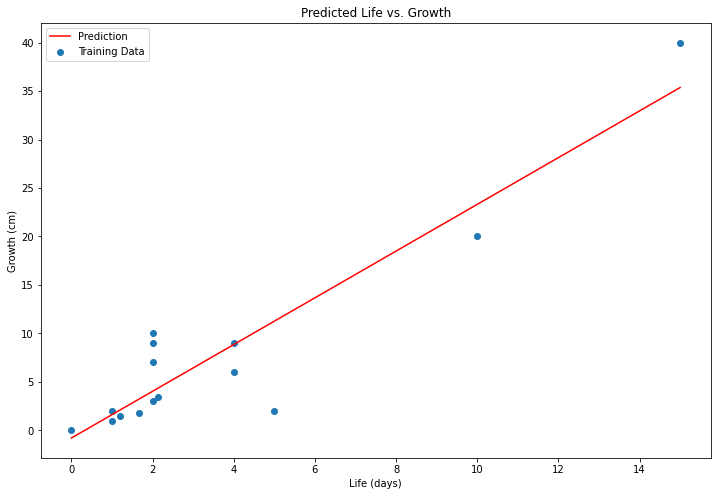

In [66]:
x = np.linspace(data['Life (days)'].min(), data['Life (days)'].max(), 100)

f = slope * x + intercept

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, f, 'r', label='Prediction')

ax.scatter(data['Life (days)'], data['Growth (cm)'], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Life (days)')
ax.set_ylabel('Growth (cm)')
ax.set_title('Predicted Life vs. Growth')

In [68]:
def predict_growth(value):
    return slope * value + intercept

In [69]:
predict_growth(2)

4.018853301758593

In [70]:
predict_growth(6)

13.665322949344873